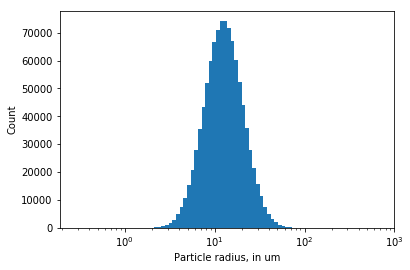

In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt

d50 = 25/1e6

a50 = d50/2
std = 0.5

mean = np.log(a50)
radii = np.random.lognormal(mean, std, int(1e6))

bin_edges = np.logspace(np.log10(0.375124), np.log10(2000), num=93)/2/1e6

ax = plt.axes()
_ = ax.hist(1e6*radii, 1e6*bin_edges)
ax.set_xscale('log')
ax.autoscale(axis='x', tight=True)
_ = ax.set_xlabel('Particle radius, in um')
_ = ax.set_ylabel('Count')

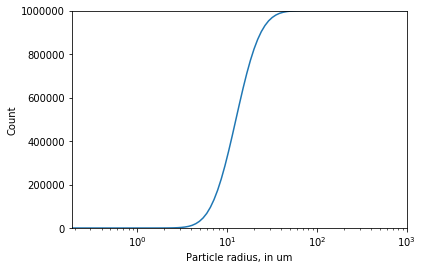

In [2]:
hist, bin_edges = np.histogram(radii, bins=bin_edges)

cumulative_count = np.cumsum(hist)
cumulative_count = np.insert(cumulative_count, 0, 0)

ax = plt.axes()
_ = ax.plot(bin_edges*1e6, cumulative_count)
ax.set_xscale('log')
ax.autoscale(tight=True)
_ = ax.set_xlabel('Particle radius, in um')
_ = ax.set_ylabel('Count')

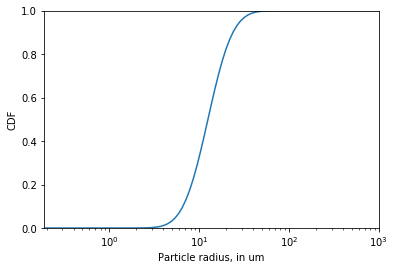

In [3]:
number_cdf = cumulative_count/np.sum(hist)

ax = plt.axes()
_ = ax.plot(bin_edges*1e6, number_cdf)
ax.set_xscale('log')
ax.autoscale(tight=True)
_ = ax.set_xlabel('Particle radius, in um')
_ = ax.set_ylabel('CDF')

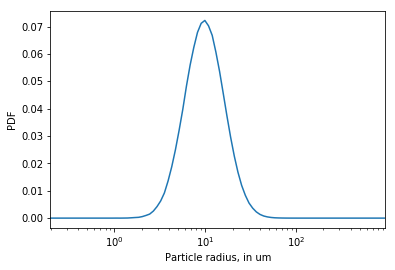

In [4]:
bin_widths = np.diff(bin_edges)

bin_centers = (bin_edges[1:] + bin_edges[:-1])/2

number_fraction = np.diff(number_cdf)

number_pdf = number_fraction/bin_widths

ax = plt.axes()
_ = ax.plot(bin_centers*1e6, number_pdf/1e6)
ax.set_xscale('log')
ax.autoscale(axis='x', tight=True)
_ = ax.set_xlabel('Particle radius, in um')
_ = ax.set_ylabel('PDF')

In [5]:
np.trapz(x=bin_centers, y=number_pdf)

1.0021766851459253

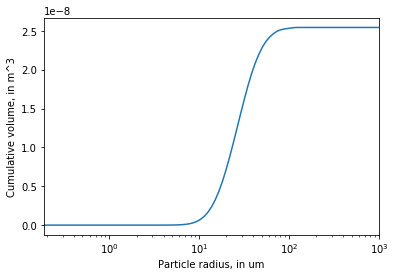

In [6]:
bin_particle_volumes = 4/3*np.pi*bin_centers**3
bin_volumes = hist*bin_particle_volumes

cumulative_volume = np.cumsum(bin_volumes)
cumulative_volume = np.insert(cumulative_volume, 0, 0)

ax = plt.axes()
_ = ax.plot(bin_edges*1e6, cumulative_volume)
ax.set_xscale('log')
ax.autoscale(axis='x', tight=True)
_ = ax.set_xlabel('Particle radius, in um')
_ = ax.set_ylabel('Cumulative volume, in m^3')

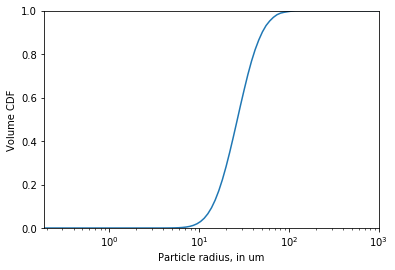

In [7]:
volume_cdf = cumulative_volume/np.sum(bin_volumes)

ax = plt.axes()
_ = ax.plot(bin_edges*1e6, volume_cdf)
ax.set_xscale('log')
ax.autoscale(tight=True)
_ = ax.set_xlabel('Particle radius, in um')
_ = ax.set_ylabel('Volume CDF')

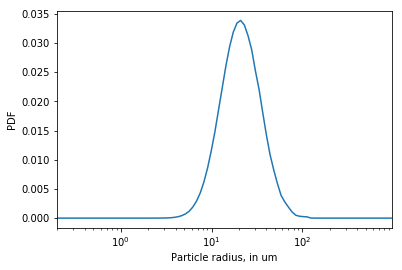

In [8]:
volume_fraction = np.diff(volume_cdf)

volume_pdf = volume_fraction/bin_widths

ax = plt.axes()
_ = ax.plot(bin_centers*1e6, volume_pdf/1e6)
ax.set_xscale('log')
ax.autoscale(axis='x', tight=True)
_ = ax.set_xlabel('Particle radius, in um')
_ = ax.set_ylabel('PDF')

In [9]:
np.trapz(x=bin_centers, y=volume_pdf)

1.0021766851459255

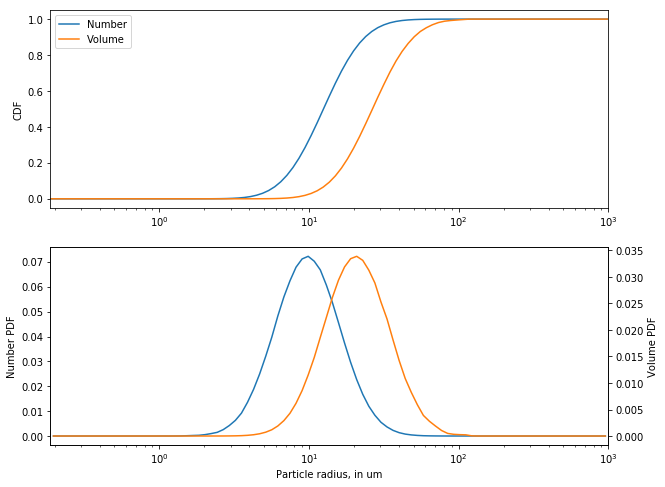

In [10]:
fig = plt.figure(figsize=(10,8))

cdf_ax = fig.add_subplot(211)
_ = cdf_ax.plot(bin_edges*1e6, number_cdf, label='Number')
volume_cdf_line = cdf_ax.plot(bin_edges*1e6, volume_cdf, label='Volume')
cdf_ax.set_xscale('log')
cdf_ax.autoscale(axis='x', tight=True)
_ = cdf_ax.set_ylabel('CDF')
_ = cdf_ax.legend()

number_pdf_ax = fig.add_subplot(212, sharex=cdf_ax)
_ = number_pdf_ax.plot(bin_centers*1e6, number_pdf/1e6, label='Number')
number_pdf_ax.autoscale(axis='x', tight=True)
_ = number_pdf_ax.set_ylabel('Number PDF')
_ = number_pdf_ax.set_xlabel('Particle radius, in um')

volume_line_color = volume_cdf_line[0].get_color()
volume_pdf_ax = number_pdf_ax.twinx()
_ = volume_pdf_ax.plot(bin_centers*1e6, volume_pdf/1e6, color=volume_line_color, label='Volume')
_ = volume_pdf_ax.set_ylabel('Volume PDF')

volume_pdf_ax.autoscale(axis='x', tight=True)

$$\left<M\right>=\frac{M}{N}$$
$$\implies M=N\left<M\right>$$
$$\left<M\right>=\int{M(a)P(a)\mathrm{d}a}$$
$$\left<M\right>=\frac{4}{3}\pi\rho\int{a^3P(a)\mathrm{d}a}$$

In [11]:
density = 2650  # kg/m**3

masses = 4/3*np.pi*density*radii**3
masses.mean()

6.7051421289567644e-11

In [12]:
4/3*np.pi*density*np.trapz(bin_centers**3*number_pdf, bin_centers)

6.7625668318058167e-11

In [13]:
4/3*np.pi*density*np.trapz(bin_centers**3*volume_pdf, bin_centers)

6.1707468615361814e-10

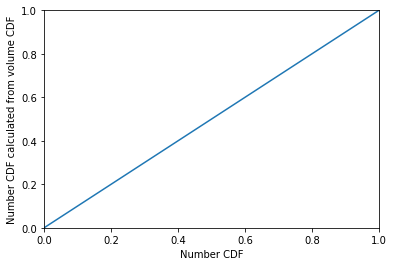

In [14]:
from said.sedimentsizedistribution import SedimentSizeDistribution

size_distribution = SedimentSizeDistribution(2*bin_edges, volume_cdf)

cdf_diameters, calc_number_cdf = size_distribution.get_number_cdf()

_ = plt.plot(number_cdf, calc_number_cdf)
plt.autoscale(tight=True)
_ = plt.xlabel('Number CDF')
_ = plt.ylabel('Number CDF calculated from volume CDF')

In [16]:
cdf_difference = calc_number_cdf - number_cdf
np.abs(cdf_difference).max()

1.1102230246251565e-16

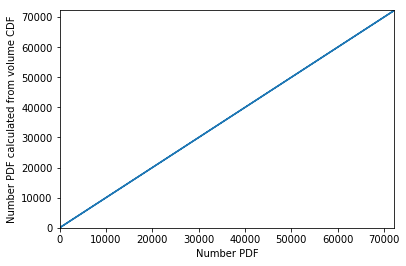

In [18]:
pdf_diameters, calc_number_pdf = size_distribution.get_number_pdf()
calc_number_pdf = 2*calc_number_pdf
_ = plt.plot(number_pdf, calc_number_pdf)
plt.autoscale(tight=True)
_ = plt.xlabel('Number PDF')
_ = plt.ylabel('Number PDF calculated from volume CDF')

In [19]:
pdf_difference = calc_number_pdf - number_pdf
np.abs(pdf_difference).max()

6.5483618527650833e-11